## Chinook Database Case Study

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

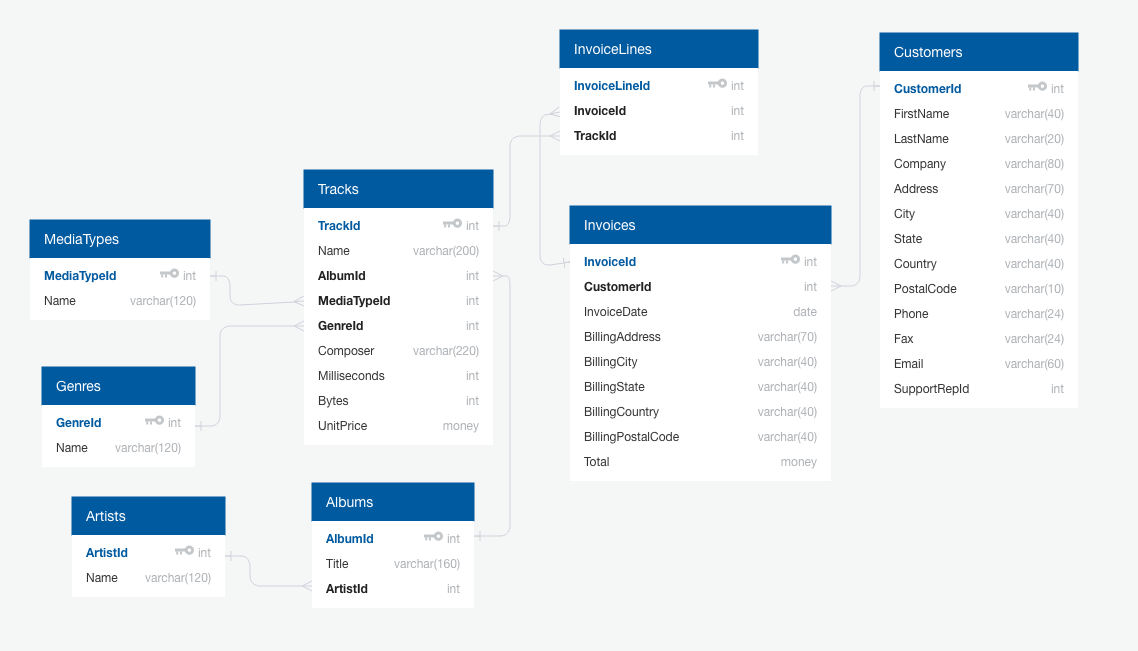

In [2]:
from IPython.display import Image
Image("imgs/chinook-erd.png")

##### Importing Libraries & Database

In [5]:
# Load sqlalchemy's create_engine
from sqlalchemy import create_engine

# Create database engine to manage connections
engine = create_engine("sqlite:///sql/chinook.sqlite")

In [6]:
# Getting tables names
table_names = engine.table_names()
table_names

<ipython-input-6-fe07500d3550>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  table_names = engine.table_names()


['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [7]:
# Load entire 'Album' table
album = pd.read_sql("Album", engine)
album.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [8]:
# Another way to get the entire 'Album' table
pd.read_sql_table("Album", engine).head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


##### Provide a query showing Customers (just their full names, customer ID and country) who are not in the US.


In [9]:
# Write query to get the specified customers' info
query = '''
select customerid, firstname, lastname, country
from customer
where not country = 'USA';
'''

In [10]:
pd.read_sql(query, engine).head()

,CustomerId,FirstName,LastName,Country
0,1,Luís,Gonçalves,Brazil
1,2,Leonie,Köhler,Germany
2,3,François,Tremblay,Canada
3,4,Bjørn,Hansen,Norway
4,5,František,Wichterlová,Czech Republic


##### Provide a query only showing the Customers from Brazil.

In [11]:
# Let's use 'pd.read_sql_query' method for simplicity
pd.read_sql_query("select * from customer where country = 'Brazil';", engine)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
2,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
3,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3
4,13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4


##### Provide a query showing the Invoices of customers who are from Brazil. The resultant table should show the customer's full name, Invoice ID, Date of the invoice and billing country.

In [12]:
query = '''
select c.firstname, c.lastname, i.invoiceid, i.invoicedate, i.billingcountry
from customer as c, invoice as i
where c.country = 'Brazil' and
c.customerid = i.customerid;
'''
pd.read_sql(query, engine).head()


,FirstName,LastName,InvoiceId,InvoiceDate,BillingCountry
0,Luís,Gonçalves,98,2008-03-10 00:00:00,Brazil
1,Luís,Gonçalves,121,2008-06-12 00:00:00,Brazil
2,Luís,Gonçalves,143,2008-09-14 00:00:00,Brazil
3,Luís,Gonçalves,195,2009-05-05 00:00:00,Brazil
4,Luís,Gonçalves,316,2010-10-27 00:00:00,Brazil


##### Provide a query showing only the Employees who are Sales Agents.

In [13]:
pd.read_sql("select * from employee where employee.title = 'Sales Support Agent';", engine)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
1,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
2,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


##### Provide a query showing a unique list of billing countries from the Invoice table.

In [14]:
pd.read_sql_query("select distinct billingcountry from invoice;", engine)

,BillingCountry
0,Germany
1,Norway
2,Belgium
3,Canada
4,USA
5,France
6,Ireland
7,United Kingdom
8,Australia
9,Chile


##### Provide a query showing the invoices of customers who are from Brazil.

In [15]:
query = ''' 
select *
from customer as c, invoice as i
where c.country = 'Brazil' and
c.customerid = i.customerid;
'''

pd.read_sql(query, engine).head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,...,SupportRepId,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,98,1,2008-03-10 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
1,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,121,1,2008-06-12 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
2,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,143,1,2008-09-14 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94
3,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,195,1,2009-05-05 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,0.99
4,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,...,3,316,1,2010-10-27 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,1.98


##### Provide a query that shows the invoices associated with each sales agent. The resultant table should include the Sales Agent's full name.

In [16]:
query = '''
select e.firstname, e.lastname, i.invoiceid, i.customerid, i.invoicedate, i.billingaddress, i.billingcountry, i.billingpostalcode, i.total
from customer as c, invoice as i
on c.customerid = i.customerid
join employee as e
on e.employeeid = c.supportrepid
order by e.employeeid;
'''

pd.read_sql(query, engine).head()

,FirstName,LastName,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCountry,BillingPostalCode,Total
0,Jane,Peacock,6,37,2007-01-19 00:00:00,Berger Straße 10,Germany,60316,0.99
1,Jane,Peacock,7,38,2007-02-01 00:00:00,Barbarossastraße 19,Germany,10779,1.98
2,Jane,Peacock,9,42,2007-02-02 00:00:00,"9, Place Louis Barthou",France,33000,3.96
3,Jane,Peacock,10,46,2007-02-03 00:00:00,3 Chatham Street,Ireland,None,5.94
4,Jane,Peacock,11,52,2007-02-06 00:00:00,202 Hoxton Street,United Kingdom,N1 5LH,8.91


##### Provide a query that shows the Invoice Total, Customer name, Country and Sale Agent name for all invoices and customers.

In [17]:
query = '''
select e.firstname as 'employee first', e.lastname as 'employee last', c.firstname as 'customer first', c.lastname as 'customer last', c.country, i.total
from employee as e
join customer as c on e.employeeid = c.supportrepid
join invoice as i on c.customerid = i.customerid
'''

pd.read_sql(query, engine).head()

,employee first,employee last,customer first,customer last,Country,Total
0,Steve,Johnson,Leonie,Köhler,Germany,1.98
1,Margaret,Park,Bjørn,Hansen,Norway,3.96
2,Margaret,Park,Daan,Peeters,Belgium,5.94
3,Steve,Johnson,Mark,Philips,Canada,8.91
4,Margaret,Park,John,Gordon,USA,13.86


##### How many Invoices were there in 2009 and 2011? What are the respective total sales for each of those years?

In [18]:
query = '''
select count(i.invoiceid), sum(i.total)
from invoice as i
where i.invoicedate between datetime('2011-01-01 00:00:00') and datetime('2011-12-31 00:00:00');
'''

pd.read_sql(query, engine).head()

,count(i.invoiceid),sum(i.total)
0,80,450.58


##### Looking at the InvoiceLine table, provide a query that COUNTs the number of line items for Invoice ID 37.

In [19]:
pd.read_sql("select count(i.invoicelineid) from invoiceline as i where i.invoiceid = 37", engine)

,count(i.invoicelineid)
0,4
